In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
num_customers = 500

data = {
    "Customer_ID": range(1, num_customers + 1),
    "Session_Duration": np.random.randint(30, 600, num_customers), 
    "Pages_Visited": np.random.randint(1, 20, num_customers),
    "Transaction_Amount": np.random.uniform(10, 500, num_customers),     "Device_Type": np.random.choice(["Mobile", "Desktop", "Tablet"], num_customers),
    "Referral_Source": np.random.choice(["Google", "Facebook", "Direct", "Instagram", "Twitter"], num_customers),
    "Bounce_Rate": np.random.uniform(0.1, 1.0, num_customers),
    "Customer_Segment": np.random.choice(["New", "Returning", "Loyal"], num_customers)
}

df = pd.DataFrame(data)

df.to_csv("customer_journey_data.csv", index=False)

print("Dataset saved as customer_journey_data.csv")


Dataset saved as customer_journey_data.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

df = pd.read_csv("customer_journey_data.csv")

print(df.head())


   Customer_ID  Session_Duration  Pages_Visited  Transaction_Amount  \
0            1               132              9          289.027324   
1            2               465              7          444.855636   
2            3               300              1          282.793577   
3            4               136              3          363.198417   
4            5               101             13          404.604334   

  Device_Type Referral_Source  Bounce_Rate Customer_Segment  
0      Mobile         Twitter     0.554686            Loyal  
1      Tablet          Google     0.970414            Loyal  
2      Mobile          Direct     0.475985              New  
3      Mobile          Google     0.985699            Loyal  
4      Tablet          Direct     0.701128              New  


In [ ]:

df.drop(columns=["Customer_ID"], inplace=True)

categorical_columns = ["Device_Type", "Referral_Source", "Customer_Segment"]

encoder = OneHotEncoder(sparse=False, drop="first")
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

df = df.drop(columns=categorical_columns)
df = pd.concat([df, encoded_df], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("Data Preprocessing Complete!")




Data Preprocessing Complete!


C:\Users\bnaga\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


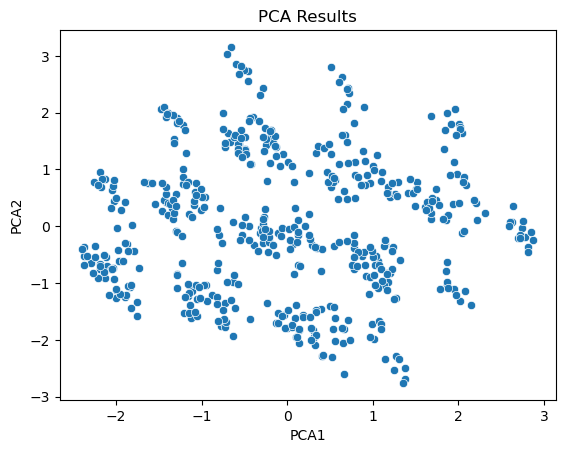

In [ ]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])

sns.scatterplot(x="PCA1", y="PCA2", data=pca_df)
plt.title("PCA Results")
plt.show()


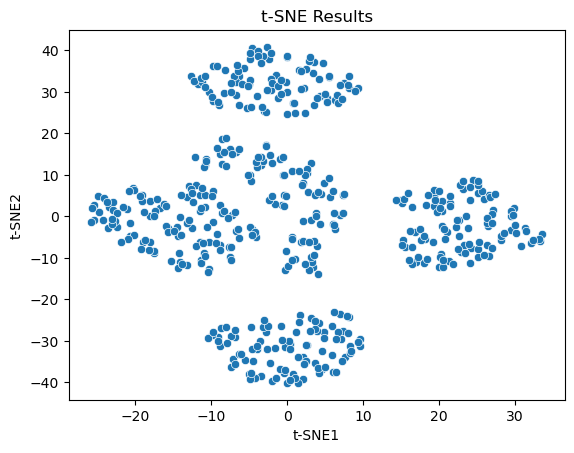

In [ ]:

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"])

sns.scatterplot(x="t-SNE1", y="t-SNE2", data=tsne_df)
plt.title("t-SNE Results")
plt.show()


C:\Users\bnaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bnaga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


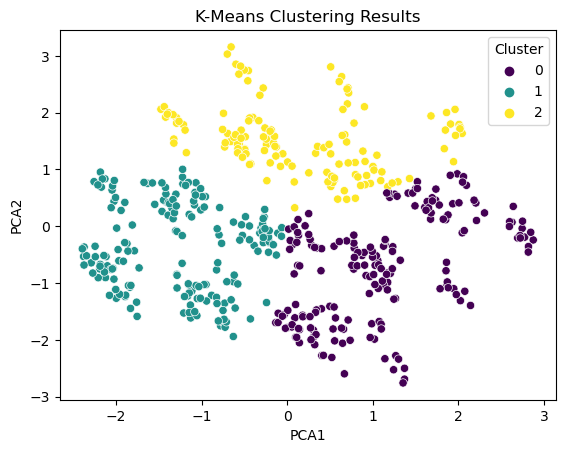

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

pca_df["Cluster"] = clusters

sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=pca_df)
plt.title("K-Means Clustering Results")
plt.show()


In [ ]:

df["Cluster"] = clusters

df.to_csv("customer_clusters.csv", index=False)
print("Results saved to customer_clusters.csv")


Results saved to customer_clusters.csv


In [23]:
df = pd.read_csv("customer_clusters.csv")
print(df.head())


   Session_Duration  Pages_Visited  Transaction_Amount  Bounce_Rate  \
0               132              9          289.027324     0.554686   
1               465              7          444.855636     0.970414   
2               300              1          282.793577     0.475985   
3               136              3          363.198417     0.985699   
4               101             13          404.604334     0.701128   

   Device_Type_Mobile  Device_Type_Tablet  Referral_Source_Facebook  \
0                 1.0                 0.0                       0.0   
1                 0.0                 1.0                       0.0   
2                 1.0                 0.0                       0.0   
3                 1.0                 0.0                       0.0   
4                 0.0                 1.0                       0.0   

   Referral_Source_Google  Referral_Source_Instagram  Referral_Source_Twitter  \
0                     0.0                        0.0             